In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]=""

# load model

In [21]:
model_dir ='/media/tohn/SSD/ModelTrainByImages/R2_3/models/B5R2b5_5FP_1FC_fold3_2.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

In [22]:
# validation
import pandas as pd
base_dir  = '/media/tohn/SSD/Images/Image3/'
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/Validationdf_fold3_2.csv')
validation_dir = os.path.join(base_dir, 'validation')

#Train
train_df = pd.read_csv( '/home/yupaporn/codes/USAI/Traindf_fold3_2.csv')
base_dir0 = '/media/tohn/SSD/Images/Image3/'
os.chdir(base_dir0)
train_dir = os.path.join(base_dir0, 'train')

# Select Data

In [23]:
import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/Validationdf_fold3_2.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
# a = df01[df01['Case'].between(1, 10)]
# dataframe = df01[df01['Abs Position']!='P8']
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(1025, 21)
(1025, 21)
Normal:  (731, 21)
Abnormal:  (294, 21)


,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,...,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename
0,0,22,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,https://irisprodseatraining.blob.core.windows....,224.0,146.0,593.0,514.0,0.227687,0.162817,0.602914,0.571713,AB01 P2 C022.JPG
1,1,22,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,https://irisprodseatraining.blob.core.windows....,200.0,141.0,589.0,501.0,0.201802,0.156841,0.592793,0.557769,AB01 P1 C022.JPG
2,2,22,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,https://irisprodseatraining.blob.core.windows....,218.0,89.0,524.0,566.0,0.230202,0.099116,0.552581,0.630303,AB02 P2 C022.JPG
3,3,22,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,https://irisprodseatraining.blob.core.windows....,155.0,67.0,506.0,639.0,0.166464,0.074874,0.543860,0.711111,AB02 P1 C022.JPG
4,4,22,P1,P1,Abnormal,AB03,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,https://irisprodseatraining.blob.core.windows....,287.0,132.0,432.0,694.0,0.292243,0.147601,0.439114,0.771717,AB03 P1 C022.JPG


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1010 non-null   int64  
 1   Case           1010 non-null   int64  
 2   Abs Position   1010 non-null   object 
 3   Sub Position   1010 non-null   object 
 4   Class          1010 non-null   object 
 5   Sub_class      1010 non-null   object 
 6   Path Full      1010 non-null   object 
 7   Path Crop      1010 non-null   object 
 8   Views          1010 non-null   object 
 9   fold           1010 non-null   int64  
 10  tagName        1010 non-null   object 
 11  originalImage  293 non-null    object 
 12  left           293 non-null    float64
 13  top            293 non-null    float64
 14  width          293 non-null    float64
 15  height         293 non-null    float64
 16  Rleft          293 non-null    float64
 17  Rtop           293 non-null    float64
 18  Rwidth  

In [24]:
batch_size = 64
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'Path Crop',
        y_col = 'Views',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1025 validated image filenames belonging to 5 classes.
{0: 'FP-A', 1: 'FP-B', 2: 'FP-C', 3: 'FP-D', 4: 'FP-E'}


# Prediction

In [25]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

#Predict
pred_list = list()
prob_list = list()
img_path=dataframe['Path Crop'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

In [26]:
dataframe.head(5)

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,...,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,category,Prob
0,0,22,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,146.0,593.0,514.0,0.227687,0.162817,0.602914,0.571713,AB01 P2 C022.JPG,FP-A,1.000000
1,1,22,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,141.0,589.0,501.0,0.201802,0.156841,0.592793,0.557769,AB01 P1 C022.JPG,FP-A,1.000000
2,2,22,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,89.0,524.0,566.0,0.230202,0.099116,0.552581,0.630303,AB02 P2 C022.JPG,FP-A,1.000000
3,3,22,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,67.0,506.0,639.0,0.166464,0.074874,0.543860,0.711111,AB02 P1 C022.JPG,FP-A,0.999993
4,4,22,P1,P1,Abnormal,AB03,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,5,...,132.0,432.0,694.0,0.292243,0.147601,0.439114,0.771717,AB03 P1 C022.JPG,FP-A,1.000000


# Visualization

In [27]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['Views'])
print('Actual : ',len(classe))
print(classe)

Predicted :  5
{'FP-E', 'FP-A', 'FP-B', 'FP-C', 'FP-D'}
Actual :  5
{'FP-E', 'FP-A', 'FP-B', 'FP-C', 'FP-D'}


In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Views'].array
pred = data_train['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.97560975609755%
              precision    recall  f1-score   support

        FP-A       0.94      0.91      0.93       205
        FP-B       0.85      0.94      0.89       205
        FP-C       0.97      0.88      0.93       205
        FP-D       0.92      1.00      0.96       205
        FP-E       0.98      0.92      0.95       205

    accuracy                           0.93      1025
   macro avg       0.93      0.93      0.93      1025
weighted avg       0.93      0.93      0.93      1025



### Confusion matrix

Text(0.5, 21.5, 'Predicted label')

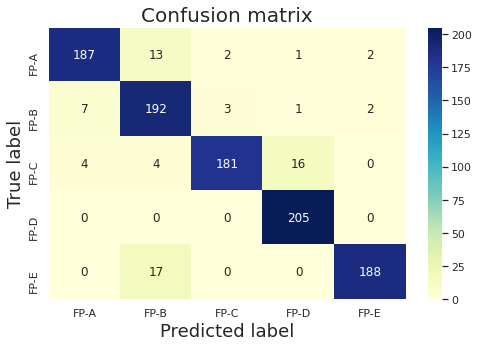

In [29]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)